In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
data=pd.read_csv('/content/sample_data/mission6.csv')

In [103]:
data.head(5)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,Yes,Yes,No
1,69,38.4,123,12,No,No,No
2,46,34.1,111,2,Yes,No,Yes
3,32,25.5,149,3,Yes,Yes,Yes
4,60,30.8,111,2,Yes,No,Yes


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1000 non-null   int64  
 1   BMI                             1000 non-null   float64
 2   Blood Pressure                  1000 non-null   int64  
 3   Physical Activity (hours/week)  1000 non-null   int64  
 4   Family History                  1000 non-null   object 
 5   Smoking Status                  1000 non-null   object 
 6   Diabetes Risk                   1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [105]:
data.isnull().sum()

,0
Age,0
BMI,0
Blood Pressure,0
Physical Activity (hours/week),0
Family History,0
Smoking Status,0
Diabetes Risk,0


In [106]:
from sklearn.preprocessing import LabelEncoder
le={}
encoding_cols=['Family History','Smoking Status','Diabetes Risk']
for col in encoding_cols:
  le[col]=LabelEncoder()
  data[col]=le[col].fit_transform(data[col])

In [107]:
data.head(5)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,1,1,0
1,69,38.4,123,12,0,0,0
2,46,34.1,111,2,1,0,1
3,32,25.5,149,3,1,1,1
4,60,30.8,111,2,1,0,1


In [108]:
from sklearn.preprocessing import StandardScaler
scale_cols=['Age','BMI','Blood Pressure','Physical Activity (hours/week)']
scaler=StandardScaler()
data[scale_cols]=scaler.fit_transform(data[scale_cols])

In [109]:
data.head(5)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,0.292348,-0.326709,0.624252,0.819329,1,1,0
1,0.970771,1.551117,0.219682,1.043006,0,0,0
2,-0.229516,0.842814,-0.319746,-1.193765,1,0,1
3,-0.960125,-0.573791,1.388441,-0.970088,1,1,1
4,0.501094,0.299233,-0.319746,-1.193765,1,0,1


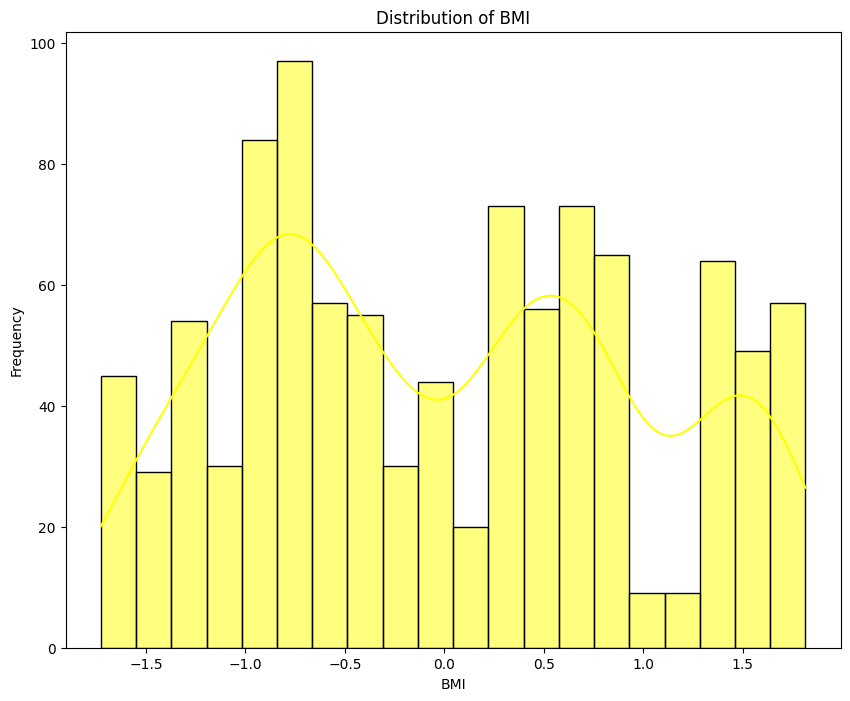

In [110]:
plt.figure(figsize=(10,8))
sns.histplot(data['BMI'],kde=True,bins=20,color='yellow')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

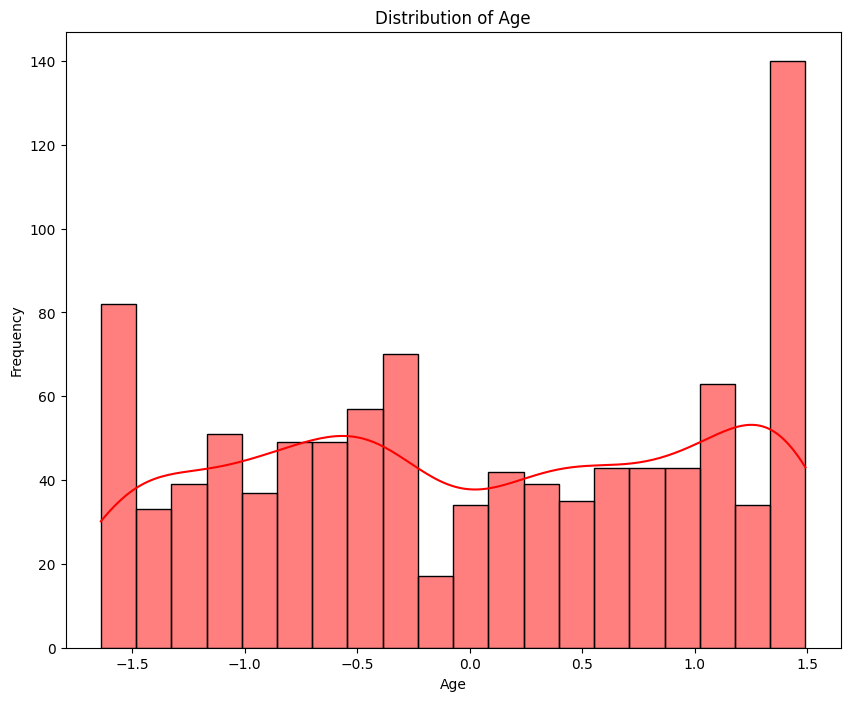

In [111]:
plt.figure(figsize=(10,8))
sns.histplot(data['Age'],kde=True,bins=20,color='red')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

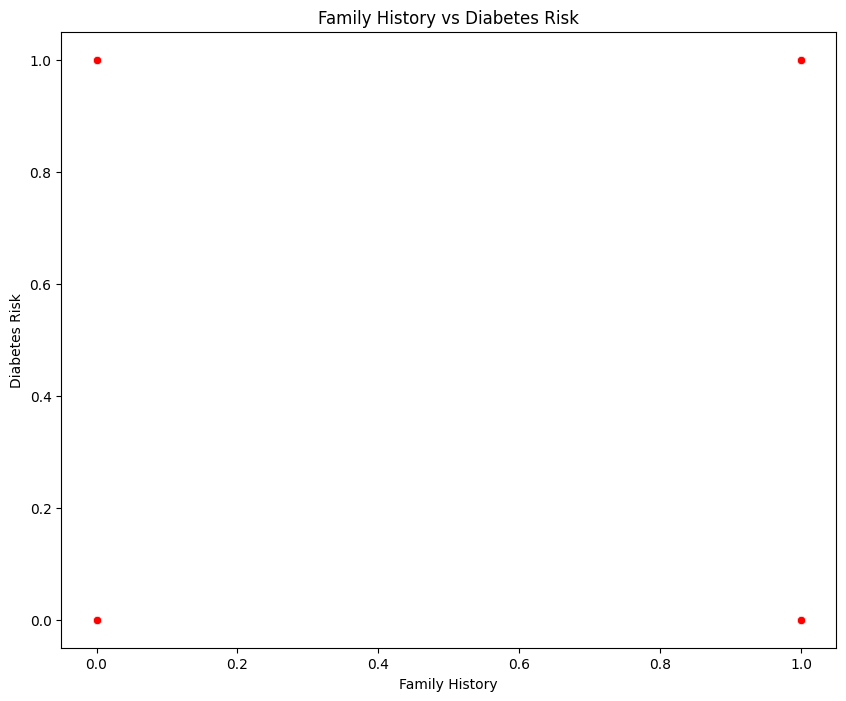

In [112]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Family History',y='Diabetes Risk',data=data,color='red')
plt.title("Family History vs Diabetes Risk")
plt.xlabel("Family History")
plt.ylabel("Diabetes Risk")
plt.show()


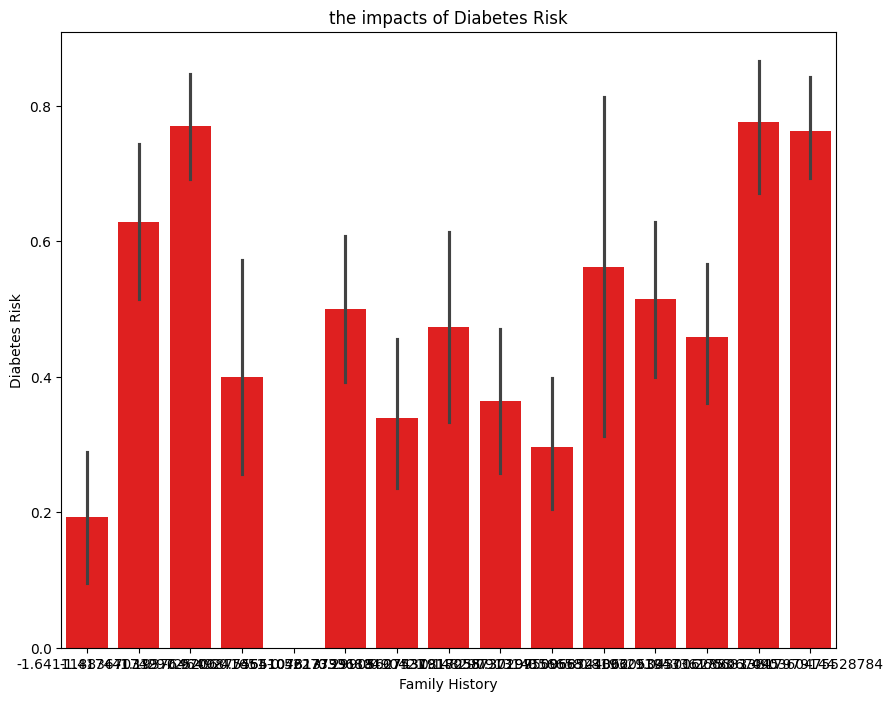

In [113]:
plt.figure(figsize=(10,8))
sns.barplot(x='Physical Activity (hours/week)',y='Diabetes Risk',data=data,color='red')
plt.title("the impacts of Diabetes Risk")
plt.xlabel("Family History")
plt.ylabel("Diabetes Risk")
plt.show()


In [114]:
from sklearn.model_selection import train_test_split
x=data.drop('Diabetes Risk',axis=1)
y=data['Diabetes Risk']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [116]:
lo=LogisticRegression()
lo.fit(x_train,y_train)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
y_predict_lo=lo.predict(x_test)
y_predict_dt=dt.predict(x_test)

In [118]:
print('accuracy_score LogisticeRegression',accuracy_score(y_test,y_predict_lo))
print('confusion_matrix LogisticeRegression',confusion_matrix(y_test,y_predict_lo))
print('classification_report LogisticeRegression',classification_report(y_test,y_predict_lo))

accuracy_score LogisticeRegression 0.55
confusion_matrix LogisticeRegression [[57 39]
 [51 53]]
classification_report LogisticeRegression               precision    recall  f1-score   support

           0       0.53      0.59      0.56        96
           1       0.58      0.51      0.54       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [119]:
print('accuracy_score DecisionTreeClassifier',accuracy_score(y_test,y_predict_dt))
print('confusion_matrix DecisionTreeClassifier',confusion_matrix(y_test,y_predict_dt))
print('classification_report DecisionTreeClassifier',classification_report(y_test,y_predict_dt))

accuracy_score DecisionTreeClassifier 1.0
confusion_matrix DecisionTreeClassifier [[ 96   0]
 [  0 104]]
classification_report DecisionTreeClassifier               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



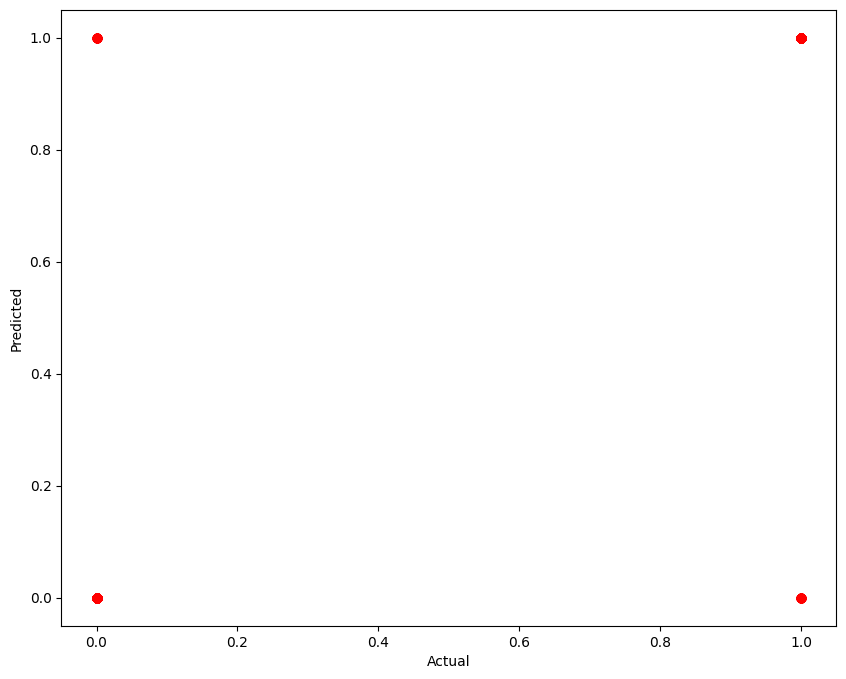

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predict_lo,color='red')
plt.scatter(y_test,y_predict_dt,color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [121]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_params={
    'max_iter':[40,50,60,30,20]

}
grid_model=GridSearchCV(LogisticRegression(),grid_params,cv=5)
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'max_iter': 40}
0.49750000000000005


In [122]:
y_predict_grid=grid_model.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_predict_grid))
print("confusion_matrix",confusion_matrix(y_test,y_predict_grid))
print("classification_report",classification_report(y_test,y_predict_grid))

accuracy_score 0.55
confusion_matrix [[57 39]
 [51 53]]
classification_report               precision    recall  f1-score   support

           0       0.53      0.59      0.56        96
           1       0.58      0.51      0.54       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [123]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_params={
    'max_leaf_nodes':[40,50,60,30,20]

}
random_model=RandomizedSearchCV(DecisionTreeClassifier(),random_params,cv=5)
random_model.fit(x_train,y_train)
print(random_model.best_params_)
print(random_model.best_score_)

{'max_leaf_nodes': 40}
1.0


In [124]:
y_predict_random=random_model.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_predict_random))
print("confusion_matrix",confusion_matrix(y_test,y_predict_random))
print("classification_report",classification_report(y_test,y_predict_random))

accuracy_score 1.0
confusion_matrix [[ 96   0]
 [  0 104]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [125]:
pip install gradio

In [126]:
data.columns

Index(['Age', 'BMI', 'Blood Pressure', 'Physical Activity (hours/week)',
       'Family History', 'Smoking Status', 'Diabetes Risk'],
      dtype='object')

In [127]:
import gradio as gr
import pandas as pd

def predict_diabetes_risk(ag, bmi, bp, pa, fh, ss):
    try:
        # إنشاء البيانات المدخلة
        input_data = pd.DataFrame({
            'Age': [ag],
            'BMI': [bmi],
            'Blood Pressure': [bp],
            'Physical Activity (hours/week)': [pa],
            'Family History': [fh],
            'Smoking Status': [ss],
        })

        # التحقق من التشفير والتقييس
        for col in encoding_cols:
            input_data[col] = le[col].transform(input_data[col])

        input_data[scale_cols] = scaler.transform(input_data[scale_cols])

        # التنبؤ باستخدام النموذج
        prediction = dt.predict(input_data)

        # إعادة النتيجة
        if prediction[0] == 0:
            return 'no'
        else:
            return 'yes'
    except Exception as e:
        # إرجاع رسالة خطأ
        return f"An error occurred: {str(e)}"

# واجهة Gradio
gr.Interface(
    inputs=[
        gr.Number(label='Age'),
        gr.Number(label='BMI'),
        gr.Number(label='Blood Pressure'),
        gr.Number(label='Physical Activity (hours/week)'),
        gr.Number(label='Family History'),
        gr.Number(label='Smoking Status'),
    ],
    fn=predict_diabetes_risk,
    outputs='text',
    title='Predict Diabetes Prediction',
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6b85fde04a82be998c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
